In [67]:
import pandas as pd
import numpy as np
import os

import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
os.getcwd()

'/Users/lavadablanton/OneDrive - Oklahoma A and M System/BANDS/Advanced Business Analytics FA21/Week 4 Variable Selection/Exercise'

In [26]:
os.chdir('/Users/lavadablanton/OneDrive - Oklahoma A and M System/BANDS/Advanced Business Analytics FA21/Week 4 Variable Selection/Exercise')

In [27]:
# import excel file
data = pd.read_excel('ENROLLMENT_DATA_F21.xlsx')

In [28]:
# Print top 5 rows
data.head()

,Target_Enroll,avg_income,CAMPUS_VISIT,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,ETHNICITY,hscrat,...,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
0,0,NaN,0,EML,1,Sep,2012,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
1,0,NaN,0,SAT,12,Feb,2014,NaN,N,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
2,0,NaN,0,C01,16,Jan,2015,NaN,C,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
3,0,NaN,0,EML,11,Mar,2015,NaN,NaN,0.037652,...,NaN,N,1,0,2580,0.5,2322,0.5,0.9,1.111111
4,0,NaN,0,TFL,28,Mar,2015,NaN,B,0.037652,...,NaN,N,2,0,2580,0.5,2322,0.5,0.9,1.111111


In [29]:
data = data.drop(['IRSCHOOL', 'ID'], axis=1)

In [30]:
# Print all column names
data.columns

Index(['Target_Enroll', 'avg_income', 'CAMPUS_VISIT', 'CONTACT_CODE1',
       'Contact_Date', 'Contact_Month', 'Contact_Year', 'distance',
       'ETHNICITY', 'hscrat', 'init_span', 'Instate', 'int1rat', 'int2rat',
       'interest', 'LEVEL_YEAR', 'mailq', 'premiere', 'REFERRAL_CNTCTS',
       'satscore', 'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq',
       'TERRITORY', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'Total',
       'AllocProportion', 'SampleSize', 'ActualProportion', 'SelectionProb',
       'SamplingWeight'],
      dtype='object')

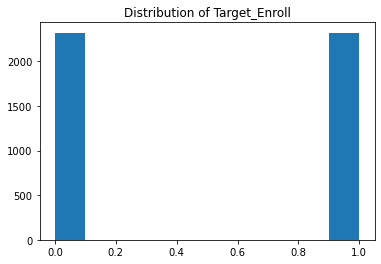

In [31]:
# Bar Plot for Target_Enroll

plt.hist(data.Target_Enroll)
plt.title("Distribution of Target_Enroll")
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target_Enroll       4644 non-null   int64  
 1   avg_income          3961 non-null   float64
 2   CAMPUS_VISIT        4644 non-null   int64  
 3   CONTACT_CODE1       4639 non-null   object 
 4   Contact_Date        4644 non-null   int64  
 5   Contact_Month       4644 non-null   object 
 6   Contact_Year        4644 non-null   int64  
 7   distance            4042 non-null   float64
 8   ETHNICITY           4107 non-null   object 
 9   hscrat              4644 non-null   float64
 10  init_span           4644 non-null   int64  
 11  Instate             4644 non-null   object 
 12  int1rat             4644 non-null   float64
 13  int2rat             4644 non-null   float64
 14  interest            4644 non-null   int64  
 15  LEVEL_YEAR          4644 non-null   object 
 16  mailq 

In [33]:
data.Target_Enroll.describe()

count    4644.000000
mean        0.500000
std         0.500054
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: Target_Enroll, dtype: float64

In [34]:
data.isnull().sum()

Target_Enroll            0
avg_income             683
CAMPUS_VISIT             0
CONTACT_CODE1            5
Contact_Date             0
Contact_Month            0
Contact_Year             0
distance               602
ETHNICITY              537
hscrat                   0
init_span                0
Instate                  0
int1rat                  0
int2rat                  0
interest                 0
LEVEL_YEAR               0
mailq                    0
premiere                 0
REFERRAL_CNTCTS          0
satscore              1704
SELF_INIT_CNTCTS         0
sex                    111
SOLICITED_CNTCTS         0
telecq                2749
TERRITORY                0
TOTAL_CONTACTS           0
TRAVEL_INIT_CNTCTS       0
Total                    0
AllocProportion          0
SampleSize               0
ActualProportion         0
SelectionProb            0
SamplingWeight           0
dtype: int64

In [35]:
#this is dropping all missing values
model_data = data.dropna()

In [36]:
#convert character values to dummy variables
cat_columns = model_data.select_dtypes(['object']).columns
data2 = model_data.drop(cat_columns, axis=1)

In [37]:
data2.head()

,Target_Enroll,avg_income,CAMPUS_VISIT,Contact_Date,Contact_Year,distance,hscrat,init_span,int1rat,int2rat,...,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,Total,AllocProportion,SampleSize,ActualProportion,SelectionProb,SamplingWeight
127,0,56800.0,0,15,2015,1109.906318,0.0,17,0.017183,0.020380,...,1,2.0,10,0,2580,0.5,2322,0.5,0.9,1.111111
144,0,95468.0,0,4,2014,781.139903,0.0,29,0.017183,0.020380,...,0,3.0,9,2,2580,0.5,2322,0.5,0.9,1.111111
208,0,43725.0,0,26,2014,919.654798,0.0,21,0.017183,0.020380,...,0,2.0,2,0,2580,0.5,2322,0.5,0.9,1.111111
214,0,62987.0,1,30,2014,625.421644,0.0,23,0.019969,0.011236,...,1,2.0,6,0,2580,0.5,2322,0.5,0.9,1.111111
251,0,47676.0,0,9,2015,489.447110,0.0,20,0.026087,0.017637,...,0,2.0,11,1,2580,0.5,2322,0.5,0.9,1.111111


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 127 to 4639
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Target_Enroll       1527 non-null   int64  
 1   avg_income          1527 non-null   float64
 2   CAMPUS_VISIT        1527 non-null   int64  
 3   Contact_Date        1527 non-null   int64  
 4   Contact_Year        1527 non-null   int64  
 5   distance            1527 non-null   float64
 6   hscrat              1527 non-null   float64
 7   init_span           1527 non-null   int64  
 8   int1rat             1527 non-null   float64
 9   int2rat             1527 non-null   float64
 10  interest            1527 non-null   int64  
 11  mailq               1527 non-null   int64  
 12  premiere            1527 non-null   int64  
 13  REFERRAL_CNTCTS     1527 non-null   int64  
 14  satscore            1527 non-null   float64
 15  SELF_INIT_CNTCTS    1527 non-null   int64  
 16  sex 

In [39]:
data2.isnull().sum()

Target_Enroll         0
avg_income            0
CAMPUS_VISIT          0
Contact_Date          0
Contact_Year          0
distance              0
hscrat                0
init_span             0
int1rat               0
int2rat               0
interest              0
mailq                 0
premiere              0
REFERRAL_CNTCTS       0
satscore              0
SELF_INIT_CNTCTS      0
sex                   0
SOLICITED_CNTCTS      0
telecq                0
TOTAL_CONTACTS        0
TRAVEL_INIT_CNTCTS    0
Total                 0
AllocProportion       0
SampleSize            0
ActualProportion      0
SelectionProb         0
SamplingWeight        0
dtype: int64

In [40]:
#data2['Target_Enroll'] = data2['Target_Enroll'].astype("category").cat.codes

In [75]:
#split data into X and Y

Y= data2[['Target_Enroll']]
X= data2.drop(['Target_Enroll'], axis=1)

In [76]:
#function for calcuting VIF
def calc_vif(X):
    
    vif=pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return(vif)

In [77]:
# Calculated since earlier trials showed signs of multicolinearity (this would not work in python)
calc_vif(X)

/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,avg_income,1.044041
1,CAMPUS_VISIT,1.259062
2,Contact_Date,1.028774
3,Contact_Year,5.517855
4,distance,1.351477
5,hscrat,1.292106
6,init_span,5.830168
7,int1rat,1.052623
8,int2rat,1.058770
9,interest,1.059400


In [79]:
X2 = X.drop(['Total', 'AllocProportion', 'SampleSize', 'ActualProportion', 'SelectionProb', 'SamplingWeight', 'Contact_Year'], axis=1)

In [83]:
#logistic regression

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.257665
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Target_Enroll   No. Observations:                 1527
Model:                          Logit   Df Residuals:                     1509
Method:                           MLE   Df Model:                           17
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.3320
Time:                        19:45:29   Log-Likelihood:                -393.46
converged:                      False   LL-Null:                       -589.04
Covariance Type:            nonrobust   LLR p-value:                 1.295e-72
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
avg_income         -1.182e-06   4.14e-06     -0.286      0.775   -9.29e-06    6.93e-06
CAMPUS_VISIT           1.1013      0.303 

/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/lavadablanton/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [84]:
# PCA 
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

In [86]:
X2.shape

(1527, 19)

In [87]:
reduce_data_pca = X2

min_max_scaler = preprocessing.MinMaxScaler()
reduc_data_pca = min_max_scaler.fit_transform(reduce_data_pca)

pca_result = pca(n_components=8).fit(reduc_data_pca)

pca_result.explained_variance_

array([0.26485086, 0.23812306, 0.19951002, 0.08207446, 0.05713857,
       0.04784262, 0.03026828, 0.02644007])

In [88]:
pca_result.components_.T*np.sqrt(pca_result.explained_variance_)

array([[ 4.92662408e-05,  2.76374291e-03,  4.07943503e-03,
        -5.80566547e-04,  1.55504288e-02, -5.28785232e-03,
         1.27813002e-02, -1.02683528e-02],
       [-1.31740491e-02, -2.93247015e-02,  7.74185361e-02,
        -1.53091175e-04,  1.96772469e-01,  8.11838539e-02,
         2.80699560e-02, -3.84787021e-02],
       [-2.02014144e-02,  7.90026337e-03, -1.42665581e-02,
         2.85548877e-01,  3.09721706e-03,  2.51308792e-03,
        -1.47131613e-03,  3.61889623e-03],
       [-6.90239200e-03, -1.01803062e-02, -3.64314220e-03,
        -1.47632055e-03,  1.12981341e-02,  1.48507962e-03,
         1.76333528e-02,  3.06835440e-02],
       [-9.20095349e-03, -1.11190372e-02, -6.11550784e-03,
        -8.37507540e-03,  3.13360783e-02, -1.56328741e-03,
         6.22839262e-02,  1.10063537e-01],
       [ 3.90543772e-02,  5.21383696e-04,  2.78273092e-02,
         5.04199438e-03,  2.59629160e-03,  1.57310812e-02,
        -8.41057270e-02, -2.13807582e-02],
       [ 3.36001850e-03, -6.810256

([<matplotlib.axis.XTick at 0x7fb600612340>,
 <a list of 8 Text major ticklabel objects>)

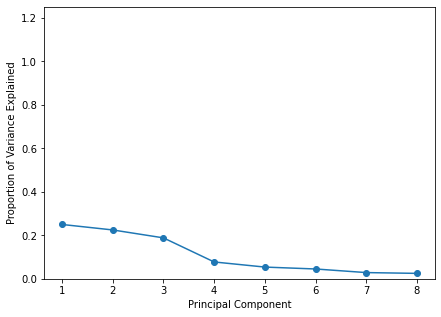

In [89]:
#screeplot 

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.ylim(0,1.25)
plt.xticks([1,2,3,4,5,6,7,8])